# カルマンフィルタの勉強

なるべく[ここ](https://ja.wikipedia.org/wiki/%E3%82%AB%E3%83%AB%E3%83%9E%E3%83%B3%E3%83%95%E3%82%A3%E3%83%AB%E3%82%BF%E3%83%BC)に忠実にやってみる

In [2]:
import numpy as np
import matplotlib.pyplot as plt

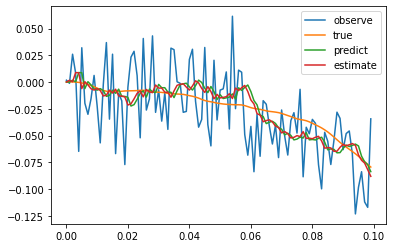

In [3]:
class Model():
    def __init__(self, x):
        self.x = x
    
    def step(self, F, G, Q, u):
        w = np.random.multivariate_normal([0]*len(Q), Q).reshape(-1, 1)
        self.x = F @ self.x + u + G @ w

    def observe(self, H, R):
        v = np.random.multivariate_normal([0]*len(R), R).reshape(-1, 1)
        z = H @ self.x + v
        return z

x_init = np.array([[0.], [0.]])

model = Model(x_init)

dt = 0.001
u=np.array([[0.], [0.]])

F = np.array([
                [1., dt],
                [0., 1.],
            ])
G = np.array([
                [dt**2/2],
                [dt],
            ])
Q = np.array([[100000.0]])

H = np.array([[1, 0]])

R = np.array([[0.0001]])

t  = 0
x_predict  = x_init.copy()
x_estimate = x_init.copy()
P = np.array([[0.1, 0.1], [0.1, 0.1]])

log_t = []
log_z = []
log_x_true = []
log_x_predict = []
log_x_estimate = []
log_P = []
for _ in range(100):
    # 現在値を取得
    z      = model.observe(H, R)
    x_true = model.x

    # 記録
    log_t.append(t)
    log_z.append(z)
    log_x_true.append(x_true)
    log_x_predict.append(x_predict)
    log_x_estimate.append(x_estimate)
    log_P.append(P)

    # ステップを進める
    model.step(F, G, Q, u)

    # 予測
    x_predict = F @ x_estimate + u
    P = F @ P @ F.T + G @ Q @ G.T

    # 更新
    e = z - H @ x_predict
    S = R + H @ P @ H.T
    K = P @ H.T @ np.linalg.inv(S)
    x_estimate = x_predict + K @ e
    P = (np.eye(2) - K @ H) @ P

    t += dt


log_t      = np.array(log_t)
log_z      = np.array(log_z)
log_x_true = np.array(log_x_true)
log_x_predict = np.array(log_x_predict)
log_x_estimate = np.array(log_x_estimate)
log_P = np.array(log_P)

plt.plot(log_t, log_z[:,0]     , label='observe')
plt.plot(log_t, log_x_true[:,0], label='true')
plt.plot(log_t, log_x_predict[:,0], label='predict')
plt.plot(log_t, log_x_estimate[:,0], label='estimate')
plt.legend()
